# Tensorflow2.0 keras + MNIST + Flatten layer + history + Dropout

In [1]:


import tensorflow as tf # ver2.x
from tensorflow.keras.datasets.mnist import load_data # ver2.x dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale # x변수 전처리
from tensorflow.keras.utils import to_categorical # 원핫코딩과 비슷한것, y변수 전처리
from tensorflow.keras import Sequential # model 생성
from tensorflow.keras.layers import Dense, Flatten, Dropout# , Flatten # layer 생성
from tensorflow.keras.models import load_model # model save/load
from sklearn.metrics import accuracy_score



In [3]:
# 1. x, y 공급 data 
(x_train, y_train), (x_val, y_val) = load_data()
x_train.shape # image # (60000, 28, 28) # 3없음:색깔없음
y_train.shape # labels # (60000,)

# x변수 전처리 : 정규화
x_train[0] # 0~255숫자가 28x28행렬형태
x_train = x_train/255.  # 255. 으로 나누어줌으로써 실수로 변경
x_val = x_val/255.


# y변수 : one hot encoding
y_train = to_categorical(y_train) # y변수 전처리 : one hot encoding
y_val = to_categorical(y_val)
y_train.shape # (60000, 10)

# 2. keras model 생성
model = Sequential()
model # object info

In [4]:

# 3. model layer
'''
model.add(Dense(node수, input_shape, activation)) # hidden layer1
model.add(Dense(node수, activation)) # hidden layer1 ~ n
'''

input_shape = (28, 28)

# Flatten layer  2d(28,28) -> 1d(784)
model.add(Flatten(input_shape = input_shape)) # 0층

# hidden layer1 = [784,128] 
model.add(Dense(128, input_shape = (784,), activation = 'relu')) # 1층
Dropout(rate=0.5) # node 50% 제거
# hidden layer2 = [128,64]
model.add(Dense(64, activation = 'relu')) # 2층
Dropout(rate=0.3)
# hidden layer3 = [64,32]
model.add(Dense(32, activation = 'relu')) # 3층
Dropout(rate=0.3)
# output layer2 = [32,10]
model.add(Dense(10, activation = 'softmax')) # 4층 : Dropout(x)


# 4. model compile : 학습환경 설정
model.compile(optimizer = 'adam', # 최적화 알고리즘(lr 생략)
              loss = 'categorical_crossentropy', # 손실
              metrics=['accuracy']) # 평가 방법

# layer 확인
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 5. model training b: train(112) vs val(38)
model_fit = model.fit(x=x_train, y=y_train,  # 학습용
          epochs=15,
          verbose=1, # 학습과정 횟수
          validation_data=(x_val, y_val) # 평가용
          )


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2534 - accuracy: 0.9253 - val_loss: 0.1219 - val_accuracy: 0.9621
Epoch 2/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1064 - accuracy: 0.9686 - val_loss: 0.1005 - val_accuracy: 0.9688
Epoch 3/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0757 - accuracy: 0.9762 - val_loss: 0.0920 - val_accuracy: 0.9713
Epoch 4/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0580 - accuracy: 0.9812 - val_loss: 0.0868 - val_accuracy: 0.9733
Epoch 5/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0467 - accuracy: 0.9847 - val_loss: 0.1038 - val_accuracy: 0.9713
Epoch 6/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0851 - val_accuracy: 0.9761
Epoch 7/15
60000/60000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


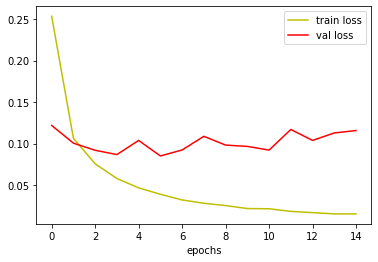

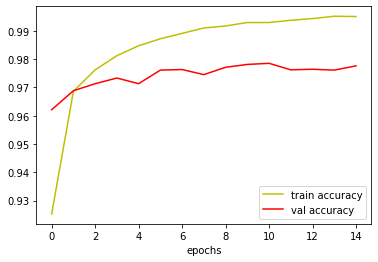

In [7]:
    

# 6. model history
print(model_fit.history.keys()) 
# dict_keys(['loss','accuracy','val_loss','val_accuracy'])
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']


import matplotlib.pyplot as plt

# train vs val loss
plt.plot(train_loss, c='y', label='train loss')
plt.plot(val_loss, c='r', label='val loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.show()

# train vs val accuracy
plt.plot(train_acc, c='y', label='train accuracy')
plt.plot(val_acc, c='r', label='val accuracy')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.show()

